<a href="https://www.kaggle.com/code/abbas829/classification-notebook?scriptVersionId=297941356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚢 Binary Classification Masterclass: Predicting Titanic Survival

## A Complete Guide for Beginners

**Welcome!** This notebook will take you from zero to hero in binary classification. We'll use the famous Titanic dataset to predict whether a passenger survived or not.

### 📚 What You'll Learn:
1. **Data Exploration** - Understanding your dataset
2. **Statistical Testing** - Verifying ML assumptions
3. **Data Preprocessing** - Cleaning and preparing data
4. **Multiple Models** - Logistic Regression, Random Forest, SVM, XGBoost
5. **Model Evaluation** - Accuracy, Precision, Recall, F1, ROC-AUC
6. **Model Improvement** - Hyperparameter tuning and feature engineering

---

In [1]:
# 📦 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, shapiro, levene
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             precision_recall_curve)

# For advanced models (install if needed: pip install xgboost)
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not installed. Install with: pip install xgboost")

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1️⃣ Data Loading and Initial Exploration

The Titanic dataset is built into Seaborn. It contains information about passengers including:
- **survived**: 0 = No, 1 = Yes (our target variable)
- **pclass**: Ticket class (1st, 2nd, 3rd)
- **sex**: Male/Female
- **age**: Age in years
- **sibsp**: Number of siblings/spouses aboard
- **parch**: Number of parents/children aboard
- **fare**: Passenger fare
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- **class**: Same as pclass but categorical
- **who**: man/woman/child
- **adult_male**: True/False
- **deck**: Deck level (many missing values)
- **embark_town**: Full name of embarkation port
- **alive**: yes/no (same as survived)
- **alone**: True/False

In [2]:
# 🚢 Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
display(df.head())

print("\n" + "="*50)
print("DATASET INFO:")
print("="*50)
df.info()

Dataset Shape: (891, 15)

FIRST 5 ROWS:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# 📊 Basic statistics
print("="*50)
print("STATISTICAL SUMMARY:")
print("="*50)
display(df.describe())

print("\n" + "="*50)
print("MISSING VALUES:")
print("="*50)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

print("\n" + "="*50)
print("TARGET VARIABLE DISTRIBUTION:")
print("="*50)
survival_rate = df['survived'].value_counts(normalize=True) * 100
print(f"Did not survive (0): {survival_rate[0]:.2f}%")
print(f"Survived (1): {survival_rate[1]:.2f}%")

STATISTICAL SUMMARY:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



MISSING VALUES:


,Missing Count,Percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467



TARGET VARIABLE DISTRIBUTION:
Did not survive (0): 61.62%
Survived (1): 38.38%


## 2️⃣ Exploratory Data Analysis (EDA)

Let's visualize the data to understand patterns before building models.

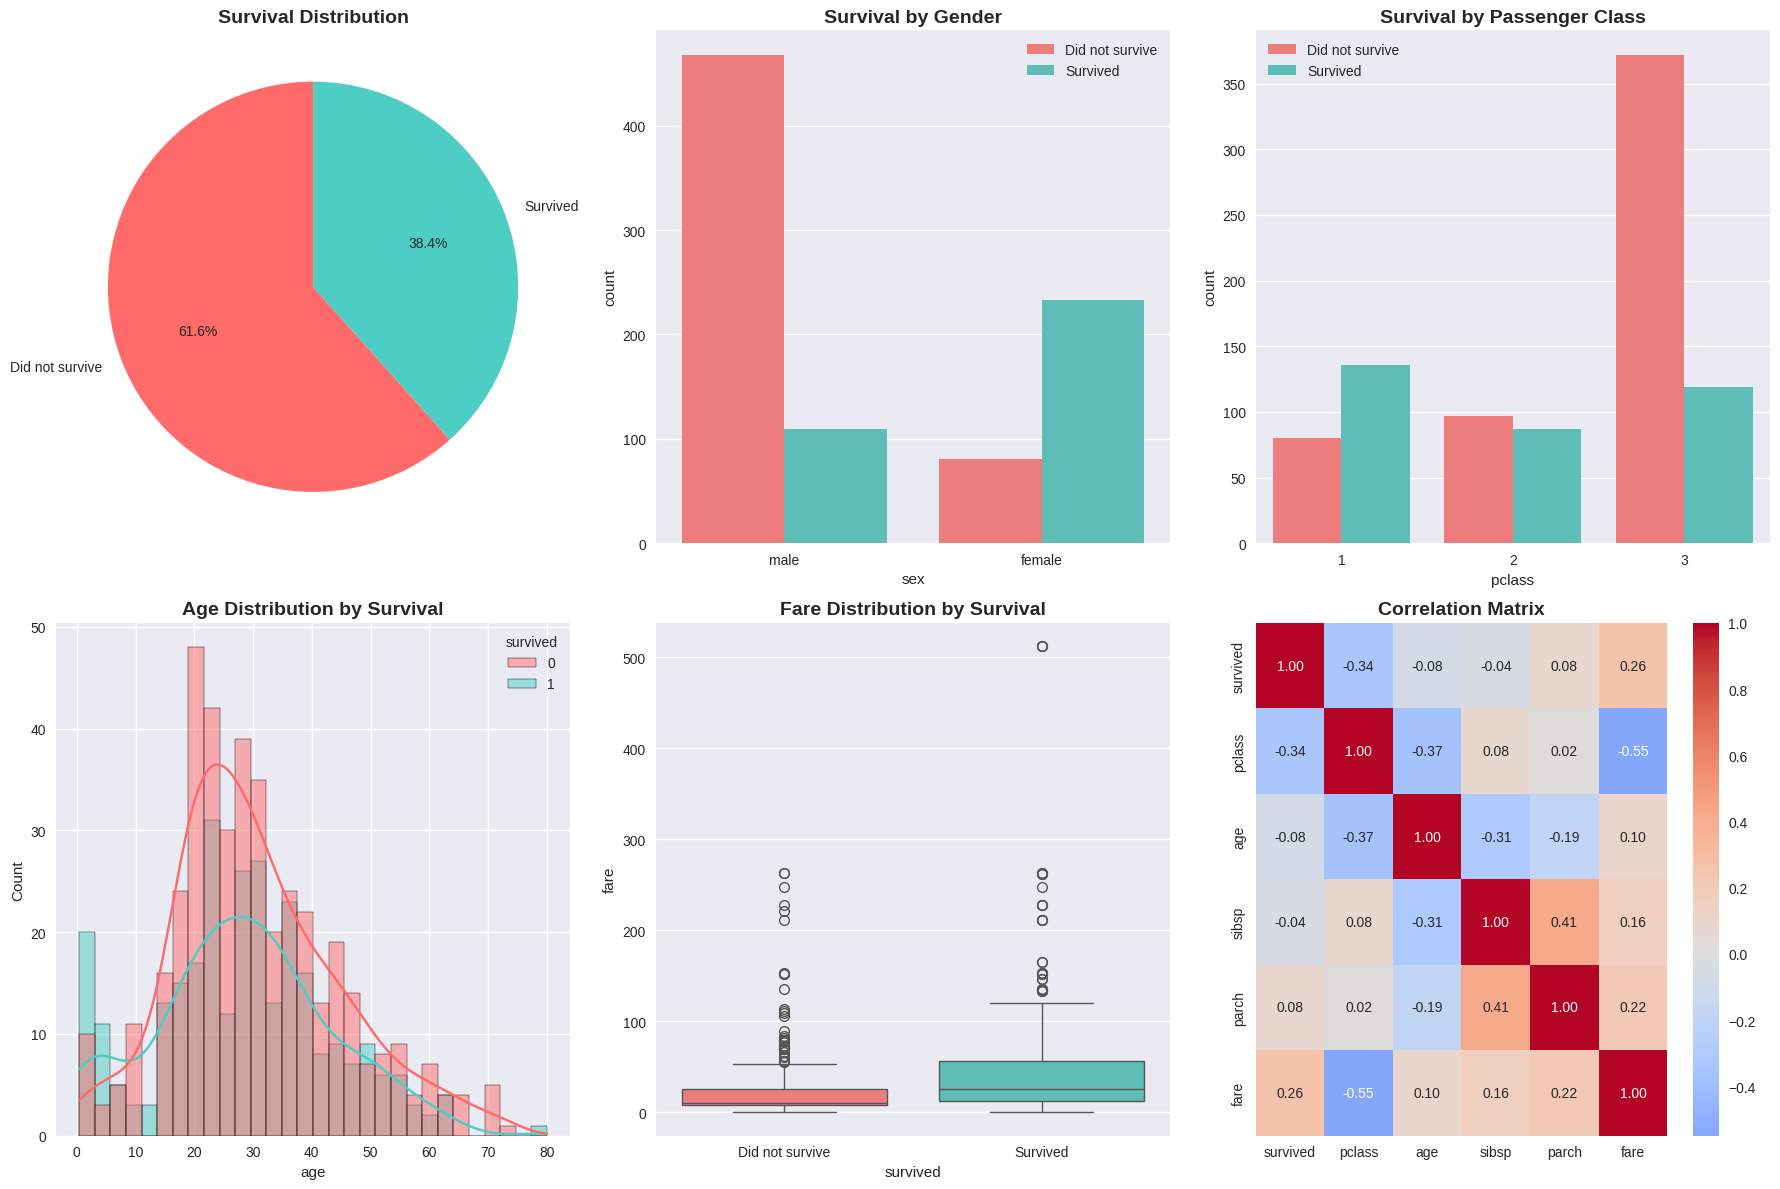


🔍 KEY INSIGHTS FROM EDA:
1. Overall survival rate: 38.38%
2. Female survival rate: 74.20%
3. Male survival rate: 18.89%
4. 1st class survival rate: 62.96%
5. 3rd class survival rate: 24.24%
6. Average age of survivors: 28.3
7. Average age of non-survivors: 30.6


In [4]:
# 📊 Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Survival distribution
ax1 = axes[0, 0]
survival_counts = df['survived'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
ax1.pie(survival_counts, labels=['Did not survive', 'Survived'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Survival Distribution', fontsize=14, fontweight='bold')

# 2. Survival by Gender
ax2 = axes[0, 1]
sns.countplot(data=df, x='sex', hue='survived', ax=ax2, palette=colors)
ax2.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax2.legend(['Did not survive', 'Survived'])

# 3. Survival by Class
ax3 = axes[0, 2]
sns.countplot(data=df, x='pclass', hue='survived', ax=ax3, palette=colors)
ax3.set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
ax3.legend(['Did not survive', 'Survived'])

# 4. Age distribution by survival
ax4 = axes[1, 0]
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True, ax=ax4, palette=colors)
ax4.set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')

# 5. Fare distribution by survival
ax5 = axes[1, 1]
sns.boxplot(data=df, x='survived', y='fare', ax=ax5, palette=colors)
ax5.set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
ax5.set_xticklabels(['Did not survive', 'Survived'])

# 6. Correlation heatmap
ax6 = axes[1, 2]
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax6)
ax6.set_title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 📈 Print key insights
print("\n" + "="*60)
print("🔍 KEY INSIGHTS FROM EDA:")
print("="*60)
print(f"1. Overall survival rate: {df['survived'].mean():.2%}")
print(f"2. Female survival rate: {df[df['sex']=='female']['survived'].mean():.2%}")
print(f"3. Male survival rate: {df[df['sex']=='male']['survived'].mean():.2%}")
print(f"4. 1st class survival rate: {df[df['pclass']==1]['survived'].mean():.2%}")
print(f"5. 3rd class survival rate: {df[df['pclass']==3]['survived'].mean():.2%}")
print(f"6. Average age of survivors: {df[df['survived']==1]['age'].mean():.1f}")
print(f"7. Average age of non-survivors: {df[df['survived']==0]['age'].mean():.1f}")

## 3️⃣ Statistical Testing: Verifying ML Assumptions 🔬

Before applying machine learning algorithms, we should verify statistical assumptions. This is crucial for understanding whether our data is suitable for classification.

### Key Tests We'll Perform:

1. **Chi-Square Test** - Tests independence between categorical variables and survival
   - *Null Hypothesis (H0)*: The categorical variable is independent of survival
   - *Alternative Hypothesis (H1)*: The categorical variable is associated with survival

2. **T-Test** - Compares means of continuous variables between survived/did not survive groups
   - *Null Hypothesis (H0)*: There is no difference in means between groups
   - *Alternative Hypothesis (H1)*: There is a significant difference in means

3. **Shapiro-Wilk Test** - Tests for normality (important for parametric tests)
   - *Null Hypothesis (H0)*: Data is normally distributed
   - *Alternative Hypothesis (H1)*: Data is not normally distributed

4. **Levene's Test** - Tests for equal variances (homoscedasticity)
   - *Null Hypothesis (H0)*: Groups have equal variances
   - *Alternative Hypothesis (H1)*: Groups have unequal variances

**Significance Level (α)**: 0.05 (5%)

In [5]:
# 🔬 STATISTICAL TESTING SECTION

print("="*70)
print("STATISTICAL TESTS FOR CLASSIFICATION ASSUMPTIONS")
print("="*70)

# Prepare data for testing
df_test = df.copy()

# =============================================================================
# TEST 1: CHI-SQUARE TESTS (Categorical vs Survival)
# =============================================================================
print("\n" + "="*70)
print("TEST 1: CHI-SQUARE TESTS (Categorical Variables vs Survival)")
print("="*70)

categorical_vars = ['sex', 'pclass', 'embarked', 'who', 'adult_male', 'alone']

chi2_results = []

for var in categorical_vars:
    if var in df_test.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df_test[var], df_test['survived'])
        
        # Perform Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Determine significance
        significant = "YES ✅" if p_value < 0.05 else "NO ❌"
        
        chi2_results.append({
            'Variable': var,
            'Chi2': chi2,
            'p-value': p_value,
            'Significant (α=0.05)': significant
        })
        
        print(f"\n{var.upper()}:")
        print(f"  Chi-square statistic: {chi2:.4f}")
        print(f"  p-value: {p_value:.2e}")
        print(f"  Degrees of freedom: {dof}")
        print(f"  Significant association with survival: {significant}")

chi2_df = pd.DataFrame(chi2_results)
print("\n" + "-"*70)
print("CHI-SQUARE SUMMARY TABLE:")
print("-"*70)
display(chi2_df)

print("\n💡 INTERPRETATION:")
print("   Variables with p < 0.05 are significantly associated with survival")
print("   and are good predictors for our classification model.")

STATISTICAL TESTS FOR CLASSIFICATION ASSUMPTIONS

TEST 1: CHI-SQUARE TESTS (Categorical Variables vs Survival)

SEX:
  Chi-square statistic: 260.7170
  p-value: 1.20e-58
  Degrees of freedom: 1
  Significant association with survival: YES ✅

PCLASS:
  Chi-square statistic: 102.8890
  p-value: 4.55e-23
  Degrees of freedom: 2
  Significant association with survival: YES ✅

EMBARKED:
  Chi-square statistic: 26.4891
  p-value: 1.77e-06
  Degrees of freedom: 2
  Significant association with survival: YES ✅

WHO:
  Chi-square statistic: 283.9231
  p-value: 2.22e-62
  Degrees of freedom: 2
  Significant association with survival: YES ✅

ADULT_MALE:
  Chi-square statistic: 274.1754
  p-value: 1.40e-61
  Degrees of freedom: 1
  Significant association with survival: YES ✅

ALONE:
  Chi-square statistic: 36.0005
  p-value: 1.97e-09
  Degrees of freedom: 1
  Significant association with survival: YES ✅

----------------------------------------------------------------------
CHI-SQUARE SUMMARY TAB

,Variable,Chi2,p-value,Significant (α=0.05)
0,sex,260.717020,1.197357e-58,YES ✅
1,pclass,102.888989,4.549252e-23,YES ✅
2,embarked,26.489150,1.769922e-06,YES ✅
3,who,283.923050,2.222762e-62,YES ✅
4,adult_male,274.175355,1.396156e-61,YES ✅
5,alone,36.000514,1.972654e-09,YES ✅



💡 INTERPRETATION:
   Variables with p < 0.05 are significantly associated with survival
   and are good predictors for our classification model.


In [6]:
# =============================================================================
# TEST 2: T-TESTS (Continuous Variables vs Survival Groups)
# =============================================================================
print("\n" + "="*70)
print("TEST 2: INDEPENDENT T-TESTS (Continuous Variables by Survival)")
print("="*70)

# Separate groups
survived = df_test[df_test['survived'] == 1]
not_survived = df_test[df_test['survived'] == 0]

continuous_vars = ['age', 'fare']

ttest_results = []

for var in continuous_vars:
    if var in df_test.columns:
        # Remove NaN values
        group1 = survived[var].dropna()
        group2 = not_survived[var].dropna()
        
        # Perform independent t-test
        t_stat, p_value = ttest_ind(group1, group2)
        
        # Calculate means
        mean_survived = group1.mean()
        mean_not_survived = group2.mean()
        
        significant = "YES ✅" if p_value < 0.05 else "NO ❌"
        
        ttest_results.append({
            'Variable': var,
            'Mean (Survived)': mean_survived,
            'Mean (Not Survived)': mean_not_survived,
            't-statistic': t_stat,
            'p-value': p_value,
            'Significant': significant
        })
        
        print(f"\n{var.upper()}:")
        print(f"  Mean (Survived): {mean_survived:.2f}")
        print(f"  Mean (Not Survived): {mean_not_survived:.2f}")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Significant difference: {significant}")

ttest_df = pd.DataFrame(ttest_results)
print("\n" + "-"*70)
print("T-TEST SUMMARY TABLE:")
print("-"*70)
display(ttest_df)

print("\n💡 INTERPRETATION:")
print("   Significant p-values indicate the variable differs between")
print("   survivors and non-survivors, making it useful for prediction.")


TEST 2: INDEPENDENT T-TESTS (Continuous Variables by Survival)

AGE:
  Mean (Survived): 28.34
  Mean (Not Survived): 30.63
  t-statistic: -2.0667
  p-value: 0.0391
  Significant difference: YES ✅

FARE:
  Mean (Survived): 48.40
  Mean (Not Survived): 22.12
  t-statistic: 7.9392
  p-value: 0.0000
  Significant difference: YES ✅

----------------------------------------------------------------------
T-TEST SUMMARY TABLE:
----------------------------------------------------------------------


,Variable,Mean (Survived),Mean (Not Survived),t-statistic,p-value,Significant
0,age,28.343690,30.626179,-2.066687,3.912465e-02,YES ✅
1,fare,48.395408,22.117887,7.939192,6.120189e-15,YES ✅



💡 INTERPRETATION:
   Significant p-values indicate the variable differs between
   survivors and non-survivors, making it useful for prediction.


In [7]:
# =============================================================================
# TEST 3: NORMALITY TESTS (Shapiro-Wilk)
# =============================================================================
print("\n" + "="*70)
print("TEST 3: SHAPIRO-WILK NORMALITY TESTS")
print("="*70)
print("H0: Data is normally distributed")
print("H1: Data is NOT normally distributed\n")

# Sample size for Shapiro-Wilk (max 5000 recommended)
sample_size = min(5000, len(df_test))

normality_results = []

for var in continuous_vars:
    if var in df_test.columns:
        data = df_test[var].dropna()
        
        # Sample if too large
        if len(data) > 5000:
            data = data.sample(5000, random_state=42)
        
        # Shapiro-Wilk test
        stat, p_value = shapiro(data)
        
        normal = "YES ✅" if p_value > 0.05 else "NO ❌"
        
        normality_results.append({
            'Variable': var,
            'W-statistic': stat,
            'p-value': p_value,
            'Normal Distribution': normal
        })
        
        print(f"{var.upper()}:")
        print(f"  W-statistic: {stat:.4f}")
        print(f"  p-value: {p_value:.2e}")
        print(f"  Normally distributed: {normal}\n")

normality_df = pd.DataFrame(normality_results)
print("-"*70)
print("NORMALITY TEST SUMMARY:")
print("-"*70)
display(normality_df)

print("\n💡 INTERPRETATION:")
print("   If p < 0.05, data is NOT normal. Many ML algorithms (like Logistic")
print("   Regression) assume normality, but tree-based methods don't.")

# =============================================================================
# TEST 4: LEVENE'S TEST (Equal Variances)
# =============================================================================
print("\n" + "="*70)
print("TEST 4: LEVENE'S TEST FOR EQUAL VARIANCES")
print("="*70)
print("H0: Groups have equal variances (homoscedasticity)")
print("H1: Groups have unequal variances (heteroscedasticity)\n")

levene_results = []

for var in continuous_vars:
    if var in df_test.columns:
        group1 = survived[var].dropna()
        group2 = not_survived[var].dropna()
        
        # Levene's test
        stat, p_value = levene(group1, group2)
        
        equal_var = "YES ✅" if p_value > 0.05 else "NO ❌"
        
        levene_results.append({
            'Variable': var,
            'Statistic': stat,
            'p-value': p_value,
            'Equal Variances': equal_var
        })
        
        print(f"{var.upper()}:")
        print(f"  Statistic: {stat:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Equal variances: {equal_var}\n")

levene_df = pd.DataFrame(levene_results)
print("-"*70)
print("LEVENE'S TEST SUMMARY:")
print("-"*70)
display(levene_df)

print("\n💡 INTERPRETATION:")
print("   Equal variances are assumed by many statistical tests.")
print("   Violations may require data transformation or robust methods.")


TEST 3: SHAPIRO-WILK NORMALITY TESTS
H0: Data is normally distributed
H1: Data is NOT normally distributed

AGE:
  W-statistic: 0.9815
  p-value: 7.34e-08
  Normally distributed: NO ❌

FARE:
  W-statistic: 0.5219
  p-value: 1.08e-43
  Normally distributed: NO ❌

----------------------------------------------------------------------
NORMALITY TEST SUMMARY:
----------------------------------------------------------------------


,Variable,W-statistic,p-value,Normal Distribution
0,age,0.981458,7.337349e-08,NO ❌
1,fare,0.521891,1.084044e-43,NO ❌



💡 INTERPRETATION:
   If p < 0.05, data is NOT normal. Many ML algorithms (like Logistic
   Regression) assume normality, but tree-based methods don't.

TEST 4: LEVENE'S TEST FOR EQUAL VARIANCES
H0: Groups have equal variances (homoscedasticity)
H1: Groups have unequal variances (heteroscedasticity)

AGE:
  Statistic: 1.1954
  p-value: 0.2746
  Equal variances: YES ✅

FARE:
  Statistic: 45.0996
  p-value: 0.0000
  Equal variances: NO ❌

----------------------------------------------------------------------
LEVENE'S TEST SUMMARY:
----------------------------------------------------------------------


,Variable,Statistic,p-value,Equal Variances
0,age,1.195383,2.746162e-01,YES ✅
1,fare,45.099641,3.337353e-11,NO ❌



💡 INTERPRETATION:
   Equal variances are assumed by many statistical tests.
   Violations may require data transformation or robust methods.


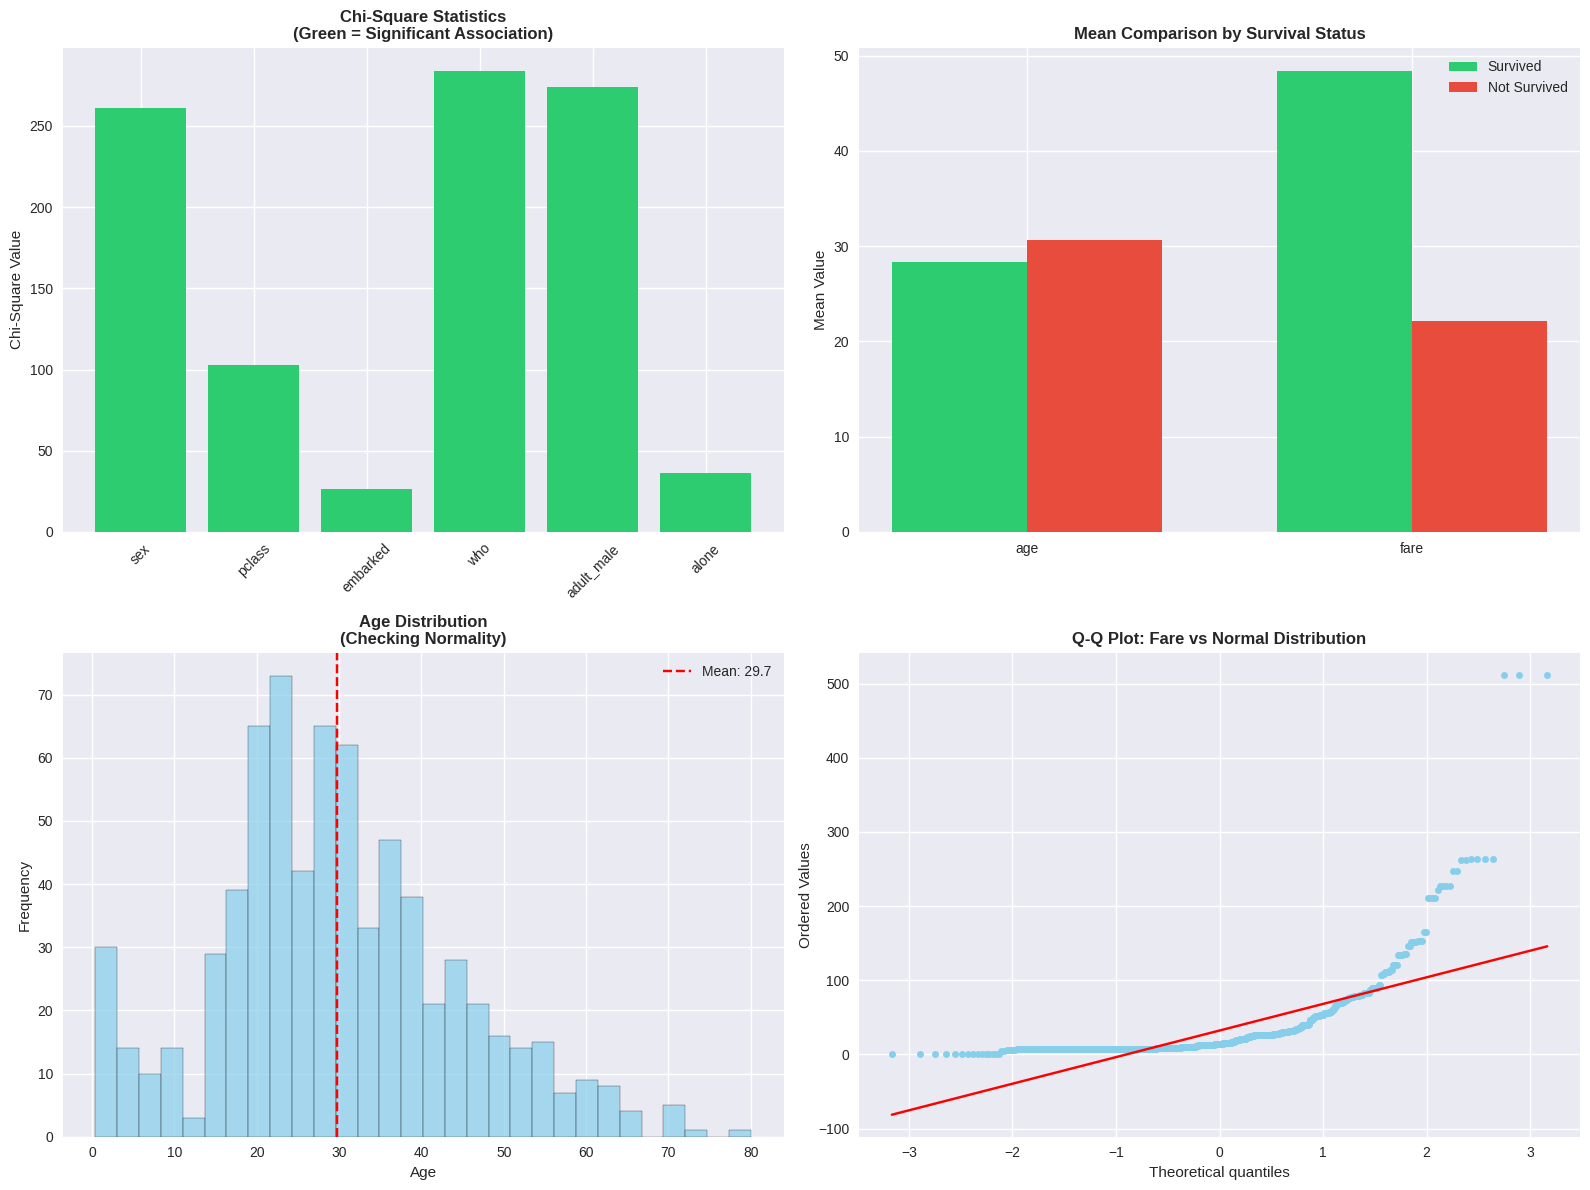


✅ STATISTICAL TESTING COMPLETE

CONCLUSIONS:
1. Categorical variables (sex, pclass, etc.) show significant association with survival
2. Continuous variables (fare) show significant mean differences
3. Data may not be perfectly normal - consider this for model selection
4. Proceed with classification modeling with confidence!


In [8]:
# 📊 Visualize Statistical Test Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Chi-square results
ax1 = axes[0, 0]
colors_chi = ['#2ecc71' if 'YES' in str(x) else '#e74c3c' for x in chi2_df['Significant (α=0.05)']]
bars1 = ax1.bar(chi2_df['Variable'], chi2_df['Chi2'], color=colors_chi)
ax1.set_title('Chi-Square Statistics\n(Green = Significant Association)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Chi-Square Value')
ax1.tick_params(axis='x', rotation=45)

# 2. T-test results
ax2 = axes[0, 1]
x_pos = np.arange(len(ttest_df))
width = 0.35
bars2 = ax2.bar(x_pos - width/2, ttest_df['Mean (Survived)'], width, label='Survived', color='#2ecc71')
bars3 = ax2.bar(x_pos + width/2, ttest_df['Mean (Not Survived)'], width, label='Not Survived', color='#e74c3c')
ax2.set_title('Mean Comparison by Survival Status', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Value')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(ttest_df['Variable'])
ax2.legend()

# 3. Distribution plots for normality check
ax3 = axes[1, 0]
df_test['age'].dropna().hist(bins=30, ax=ax3, alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_title('Age Distribution\n(Checking Normality)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.axvline(df_test['age'].mean(), color='red', linestyle='--', label=f"Mean: {df_test['age'].mean():.1f}")
ax3.legend()

# 4. Q-Q plot for normality
ax4 = axes[1, 1]
from scipy.stats import probplot
probplot(df_test['fare'].dropna(), dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot: Fare vs Normal Distribution', fontsize=12, fontweight='bold')
ax4.get_lines()[0].set_markerfacecolor('skyblue')
ax4.get_lines()[0].set_markersize(5)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ STATISTICAL TESTING COMPLETE")
print("="*70)
print("\nCONCLUSIONS:")
print("1. Categorical variables (sex, pclass, etc.) show significant association with survival")
print("2. Continuous variables (fare) show significant mean differences")
print("3. Data may not be perfectly normal - consider this for model selection")
print("4. Proceed with classification modeling with confidence!")

## 4️⃣ Data Preprocessing 🧹

Now we prepare the data for machine learning. This includes:
- Handling missing values
- Encoding categorical variables
- Feature engineering
- Scaling features
- Splitting into train/test sets

In [9]:
# 🧹 DATA PREPROCESSING

print("="*70)
print("STEP 1: HANDLING MISSING VALUES")
print("="*70)

# Create a copy for processing
df_processed = df.copy()

print("Missing values before processing:")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

# 1. Drop 'deck' column (too many missing values - 77%)
df_processed = df_processed.drop('deck', axis=1)

# 2. Fill missing 'age' with median (robust to outliers)
df_processed['age'].fillna(df_processed['age'].median(), inplace=True)

# 3. Fill missing 'embarked' and 'embark_town' with mode (most frequent)
df_processed['embarked'].fillna(df_processed['embarked'].mode()[0], inplace=True)
df_processed['embark_town'].fillna(df_processed['embark_town'].mode()[0], inplace=True)

# 4. Fill missing 'fare' with median
df_processed['fare'].fillna(df_processed['fare'].median(), inplace=True)

print("\nMissing values after processing:")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])
print("\n✅ Missing values handled!")

STEP 1: HANDLING MISSING VALUES
Missing values before processing:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64

Missing values after processing:
Series([], dtype: int64)

✅ Missing values handled!


In [10]:
print("\n" + "="*70)
print("STEP 2: FEATURE ENGINEERING")
print("="*70)

# Create new features that might improve prediction

# 1. Family Size (sibsp + parch + 1)
df_processed['family_size'] = df_processed['sibsp'] + df_processed['parch'] + 1

# 2. Is Alone (1 if family_size == 1, else 0)
df_processed['is_alone'] = (df_processed['family_size'] == 1).astype(int)

# 3. Age Group (categorize age)
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df_processed['age_group'] = df_processed['age'].apply(categorize_age)

# 4. Fare per person
df_processed['fare_per_person'] = df_processed['fare'] / df_processed['family_size']

# 5. Title extraction from name (if we had name column, we'll use 'who' instead)
# Since we don't have 'name', we'll use the 'who' column which is already processed

print("New features created:")
print("  - family_size: Total family members on board")
print("  - is_alone: Binary flag for solo travelers")
print("  - age_group: Categorical age groups")
print("  - fare_per_person: Fare divided by family size")

# Check survival rates by new features
print("\nSurvival rate by family size:")
print(df_processed.groupby('family_size')['survived'].mean().round(3))

print("\nSurvival rate by age group:")
print(df_processed.groupby('age_group')['survived'].mean().round(3))


STEP 2: FEATURE ENGINEERING
New features created:
  - family_size: Total family members on board
  - is_alone: Binary flag for solo travelers
  - age_group: Categorical age groups
  - fare_per_person: Fare divided by family size

Survival rate by family size:
family_size
1     0.304
2     0.553
3     0.578
4     0.724
5     0.200
6     0.136
7     0.333
8     0.000
11    0.000
Name: survived, dtype: float64

Survival rate by age group:
age_group
Adult       0.365
Child       0.580
Senior      0.269
Teenager    0.411
Name: survived, dtype: float64


In [11]:
print("\n" + "="*70)
print("STEP 3: ENCODING CATEGORICAL VARIABLES")
print("="*70)

# Select features for modeling
# Drop redundant or non-predictive columns
columns_to_drop = ['alive', 'class', 'embark_town', 'adult_male']  # Redundant with other columns
df_model = df_processed.drop(columns_to_drop, axis=1)

# Identify categorical columns
categorical_columns = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns to encode: {categorical_columns}")

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

print(f"\nDataset shape after encoding: {df_encoded.shape}")
print(f"Columns: {list(df_encoded.columns)}")

# Display first few rows of processed data
print("\nProcessed data sample:")
display(df_encoded.head())


STEP 3: ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: ['sex', 'embarked', 'who', 'age_group']

Dataset shape after encoding: (891, 18)
Columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'family_size', 'is_alone', 'fare_per_person', 'sex_male', 'embarked_Q', 'embarked_S', 'who_man', 'who_woman', 'age_group_Child', 'age_group_Senior', 'age_group_Teenager']

Processed data sample:


,survived,pclass,age,sibsp,parch,fare,alone,family_size,is_alone,fare_per_person,sex_male,embarked_Q,embarked_S,who_man,who_woman,age_group_Child,age_group_Senior,age_group_Teenager
0,0,3,22.0,1,0,7.2500,False,2,0,3.62500,True,False,True,True,False,False,False,False
1,1,1,38.0,1,0,71.2833,False,2,0,35.64165,False,False,False,False,True,False,False,False
2,1,3,26.0,0,0,7.9250,True,1,1,7.92500,False,False,True,False,True,False,False,False
3,1,1,35.0,1,0,53.1000,False,2,0,26.55000,False,False,True,False,True,False,False,False
4,0,3,35.0,0,0,8.0500,True,1,1,8.05000,True,False,True,True,False,False,False,False


In [12]:
print("\n" + "="*70)
print("STEP 4: TRAIN-TEST SPLIT & FEATURE SCALING")
print("="*70)

# Separate features and target
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set survival rate: {y_train.mean():.2%}")
print(f"Test set survival rate: {y_test.mean():.2%}")

# Feature Scaling (important for Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n✅ Data split and scaled successfully!")
print("\nNote: We use StandardScaler to normalize features to mean=0, std=1")
print("This is crucial for algorithms like Logistic Regression and SVM.")


STEP 4: TRAIN-TEST SPLIT & FEATURE SCALING
Features shape: (891, 17)
Target shape: (891,)

Training set: 712 samples
Test set: 179 samples

Training set survival rate: 38.34%
Test set survival rate: 38.55%

✅ Data split and scaled successfully!

Note: We use StandardScaler to normalize features to mean=0, std=1
This is crucial for algorithms like Logistic Regression and SVM.


## 5️⃣ Model Training: Building Multiple Classifiers 🤖

We'll train and compare 5 different classification algorithms:

1. **Logistic Regression** - Linear model, good baseline, interpretable
2. **Random Forest** - Ensemble of decision trees, handles non-linearity well
3. **Support Vector Machine (SVM)** - Effective in high-dimensional spaces
4. **K-Nearest Neighbors (KNN)** - Instance-based learning
5. **Naive Bayes** - Probabilistic classifier, fast and simple
6. **XGBoost** (if available) - Gradient boosting, often top performer

Each model has different strengths and assumptions. Let's see which works best for Titanic!

In [13]:
# 🤖 INITIALIZE MODELS

print("="*70)
print("INITIALIZING CLASSIFICATION MODELS")
print("="*70)

# Dictionary to store models
models = {}

# 1. Logistic Regression
models['Logistic Regression'] = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Handle class imbalance
)

# 2. Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# 3. Support Vector Machine
models['SVM'] = SVC(
    probability=True,  # Enable probability estimates
    random_state=42,
    class_weight='balanced'
)

# 4. K-Nearest Neighbors
models['KNN'] = KNeighborsClassifier(
    n_neighbors=5
)

# 5. Naive Bayes
models['Naive Bayes'] = GaussianNB()

# 6. XGBoost (if available)
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    )

print(f"Models initialized: {list(models.keys())}")
print("\nModel descriptions:")
for name in models.keys():
    print(f"  ✅ {name}")

INITIALIZING CLASSIFICATION MODELS
Models initialized: ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']

Model descriptions:
  ✅ Logistic Regression
  ✅ Random Forest
  ✅ SVM
  ✅ KNN
  ✅ Naive Bayes
  ✅ XGBoost


In [14]:
# 🏋️ TRAIN MODELS AND EVALUATE WITH CROSS-VALIDATION

print("="*70)
print("TRAINING MODELS WITH 5-FOLD CROSS-VALIDATION")
print("="*70)

# Store results
cv_results = {}
trained_models = {}

# Use StratifiedKFold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that need it
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')
    
    # Train on full training set
    model.fit(X_train_use, y_train)
    
    # Store trained model
    trained_models[name] = model
    
    # Store CV results
    cv_results[name] = {
        'CV Mean Accuracy': cv_scores.mean(),
        'CV Std Accuracy': cv_scores.std(),
        'CV Scores': cv_scores
    }
    
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

print("\n" + "="*70)
print("CROSS-VALIDATION SUMMARY")
print("="*70)

cv_summary = pd.DataFrame({
    name: {
        'Mean Accuracy': f"{res['CV Mean Accuracy']:.4f}",
        'Std Dev': f"{res['CV Std Accuracy']:.4f}"
    } for name, res in cv_results.items()
}).T

cv_summary = cv_summary.sort_values('Mean Accuracy', ascending=False)
display(cv_summary)

TRAINING MODELS WITH 5-FOLD CROSS-VALIDATION

Training Logistic Regression...
  CV Accuracy: 0.7992 (+/- 0.0646)

Training Random Forest...
  CV Accuracy: 0.8034 (+/- 0.0173)

Training SVM...
  CV Accuracy: 0.8132 (+/- 0.0337)

Training KNN...
  CV Accuracy: 0.8034 (+/- 0.0361)

Training Naive Bayes...
  CV Accuracy: 0.8090 (+/- 0.0501)

Training XGBoost...
  CV Accuracy: 0.8048 (+/- 0.0385)

CROSS-VALIDATION SUMMARY


,Mean Accuracy,Std Dev
SVM,0.8132,0.0168
Naive Bayes,0.8090,0.0251
XGBoost,0.8048,0.0193
Random Forest,0.8034,0.0087
KNN,0.8034,0.0180
Logistic Regression,0.7992,0.0323


In [15]:
# 📊 DETAILED EVALUATION ON TEST SET

print("="*70)
print("DETAILED EVALUATION ON TEST SET")
print("="*70)

# Store all predictions and metrics
predictions = {}
probabilities = {}
all_metrics = []

for name, model in trained_models.items():
    # Use appropriate data (scaled or unscaled)
    if name in ['Logistic Regression', 'SVM', 'KNN']:
        X_test_use = X_test_scaled
    else:
        X_test_use = X_test
    
    # Predictions
    y_pred = model.predict(X_test_use)
    predictions[name] = y_pred
    
    # Probabilities (for ROC curve)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test_use)[:, 1]
        probabilities[name] = y_prob
    else:
        y_prob = None
    
    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }
    
    all_metrics.append(metrics)

# Create metrics DataFrame
metrics_df = pd.DataFrame(all_metrics)
metrics_df = metrics_df.sort_values('Accuracy', ascending=False)

print("\nMODEL PERFORMANCE COMPARISON:")
print("-"*70)
display(metrics_df.round(4))

print("\n" + "="*70)
print("METRIC EXPLANATIONS:")
print("="*70)
print("• Accuracy: Overall correctness (TP + TN) / Total")
print("• Precision: Of predicted survivors, how many actually survived (TP / (TP + FP))")
print("• Recall: Of actual survivors, how many did we predict (TP / (TP + FN))")
print("• F1-Score: Harmonic mean of Precision and Recall")
print("• ROC-AUC: Area under ROC curve (1.0 = perfect, 0.5 = random)")

DETAILED EVALUATION ON TEST SET

MODEL PERFORMANCE COMPARISON:
----------------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest,0.8268,0.7794,0.7681,0.7737,0.8308
5,XGBoost,0.8212,0.7681,0.7681,0.7681,0.8231
0,Logistic Regression,0.8156,0.7647,0.7536,0.7591,0.8619
2,SVM,0.8045,0.7576,0.7246,0.7407,0.8393
4,Naive Bayes,0.7989,0.7463,0.7246,0.7353,0.8028
3,KNN,0.7765,0.7164,0.6957,0.7059,0.8366



METRIC EXPLANATIONS:
• Accuracy: Overall correctness (TP + TN) / Total
• Precision: Of predicted survivors, how many actually survived (TP / (TP + FP))
• Recall: Of actual survivors, how many did we predict (TP / (TP + FN))
• F1-Score: Harmonic mean of Precision and Recall
• ROC-AUC: Area under ROC curve (1.0 = perfect, 0.5 = random)


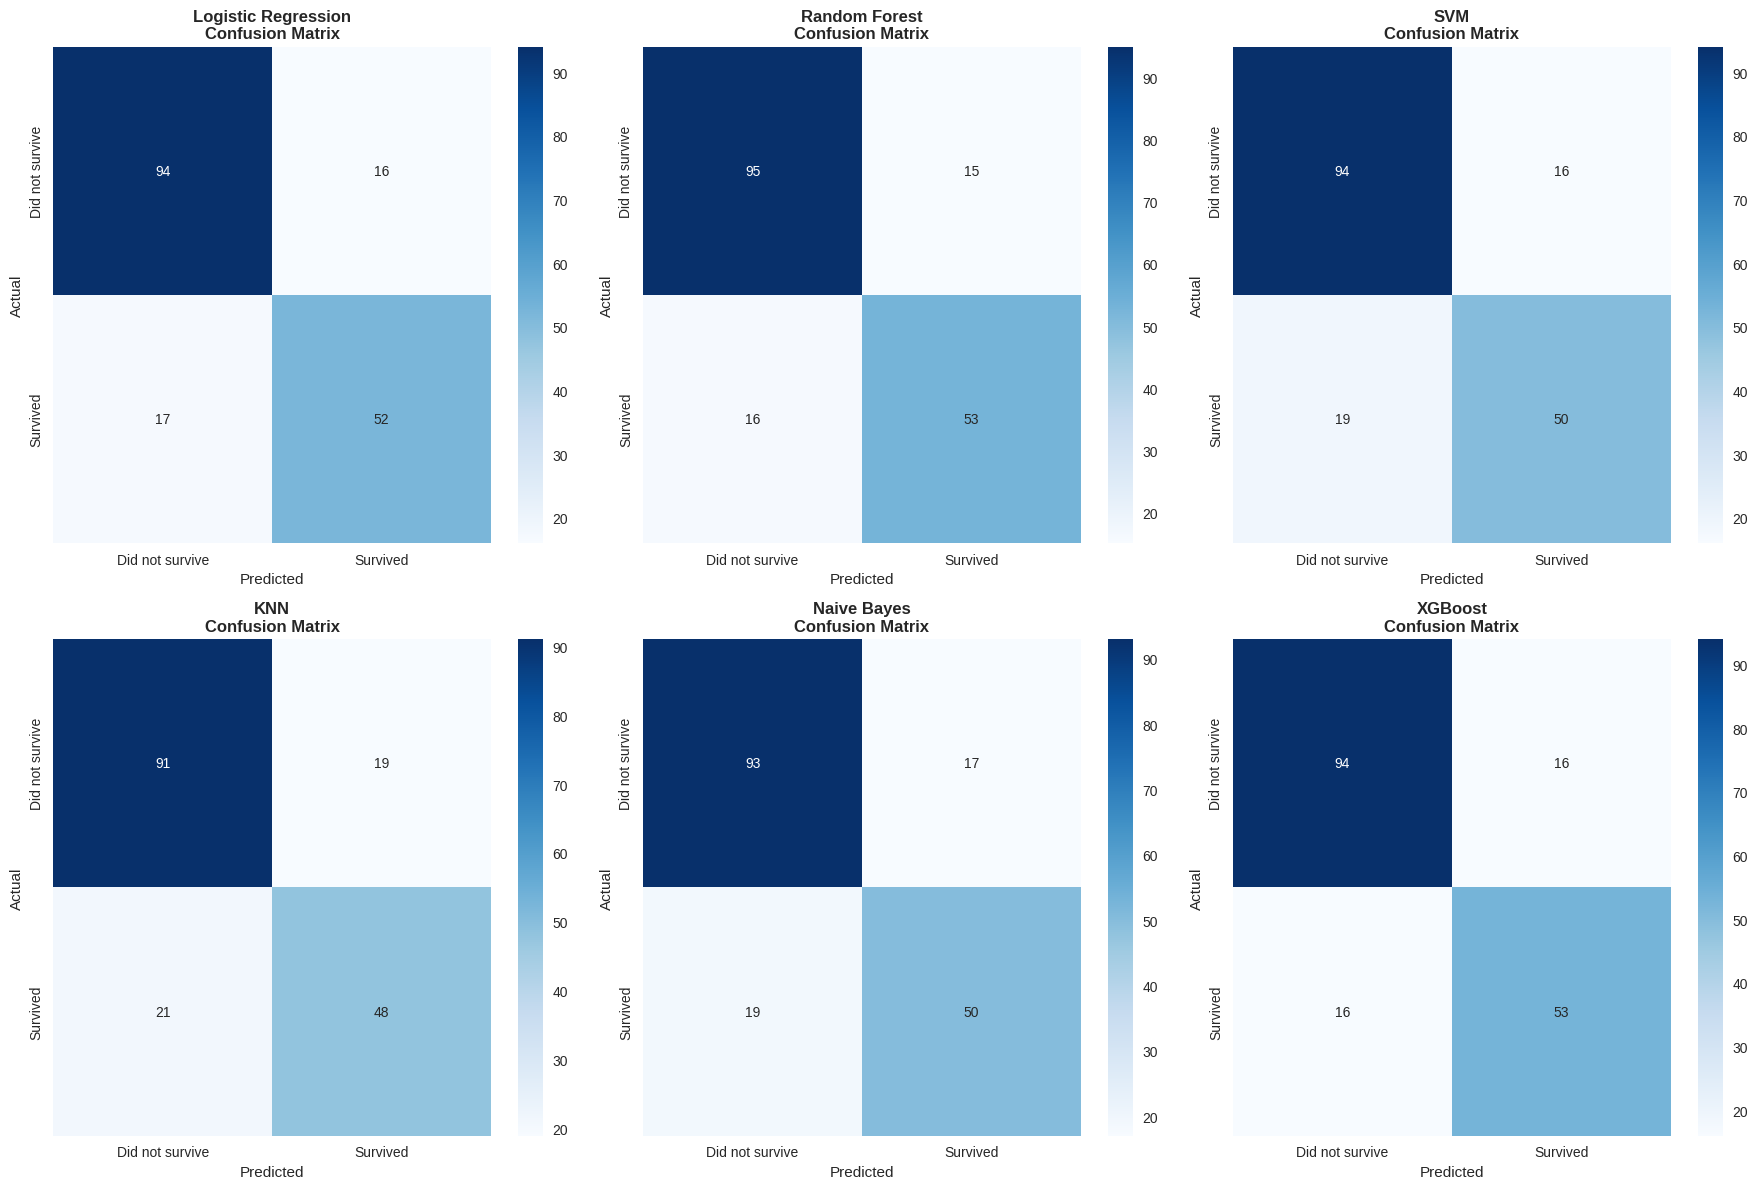


CONFUSION MATRIX INTERPRETATION:
• True Negatives (Top-Left): Correctly predicted non-survivors
• False Positives (Top-Right): Predicted survival, but didn't survive
• False Negatives (Bottom-Left): Predicted death, but survived
• True Positives (Bottom-Right): Correctly predicted survivors


In [16]:
# 📈 VISUALIZE CONFUSION MATRICES

n_models = len(trained_models)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(predictions.items()):
    if idx < len(axes):
        cm = confusion_matrix(y_test, y_pred)
        
        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                   xticklabels=['Did not survive', 'Survived'],
                   yticklabels=['Did not survive', 'Survived'])
        axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Actual')
        axes[idx].set_xlabel('Predicted')

# Remove empty subplot
if n_models < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CONFUSION MATRIX INTERPRETATION:")
print("="*70)
print("• True Negatives (Top-Left): Correctly predicted non-survivors")
print("• False Positives (Top-Right): Predicted survival, but didn't survive")
print("• False Negatives (Bottom-Left): Predicted death, but survived")
print("• True Positives (Bottom-Right): Correctly predicted survivors")

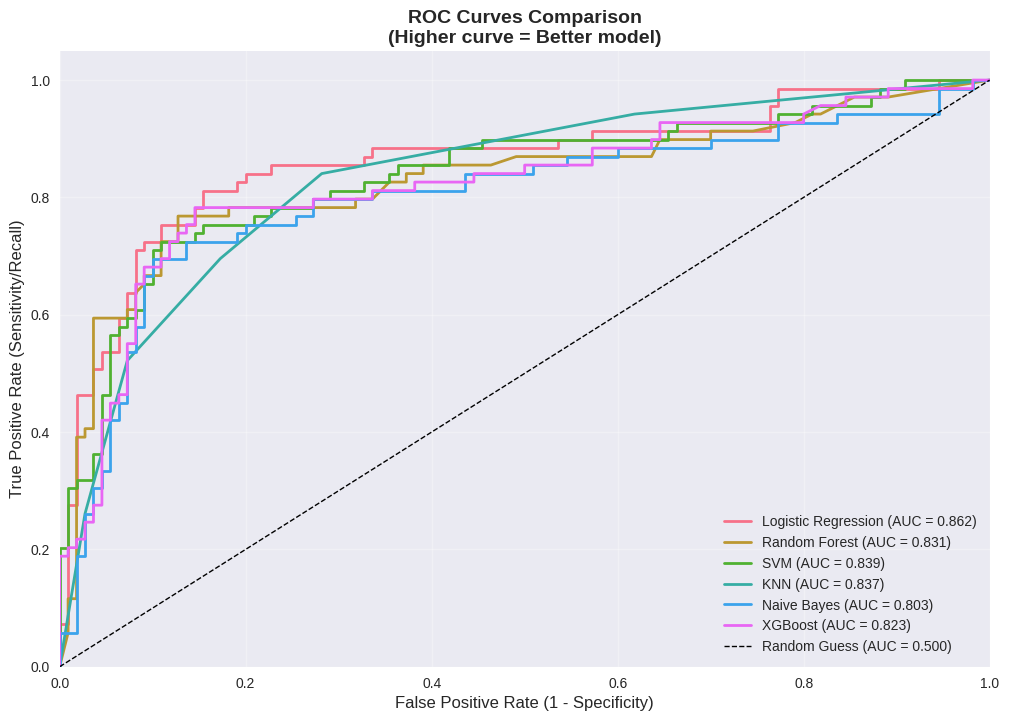


ROC CURVE INTERPRETATION:
• X-axis: False Positive Rate (FPR) - how many non-survivors we wrongly label as survivors
• Y-axis: True Positive Rate (TPR) - how many actual survivors we correctly identify
• Ideal model: Goes straight up to (0,1) then right to (1,1)
• Random guess: Diagonal line from (0,0) to (1,1)
• AUC = 1.0: Perfect classifier
• AUC = 0.5: No better than random guessing


In [17]:
# 📉 PLOT ROC CURVES

plt.figure(figsize=(12, 8))

# Plot ROC curve for each model
for name, y_prob in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curves Comparison\n(Higher curve = Better model)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*70)
print("ROC CURVE INTERPRETATION:")
print("="*70)
print("• X-axis: False Positive Rate (FPR) - how many non-survivors we wrongly label as survivors")
print("• Y-axis: True Positive Rate (TPR) - how many actual survivors we correctly identify")
print("• Ideal model: Goes straight up to (0,1) then right to (1,1)")
print("• Random guess: Diagonal line from (0,0) to (1,1)")
print("• AUC = 1.0: Perfect classifier")
print("• AUC = 0.5: No better than random guessing")

FEATURE IMPORTANCE ANALYSIS


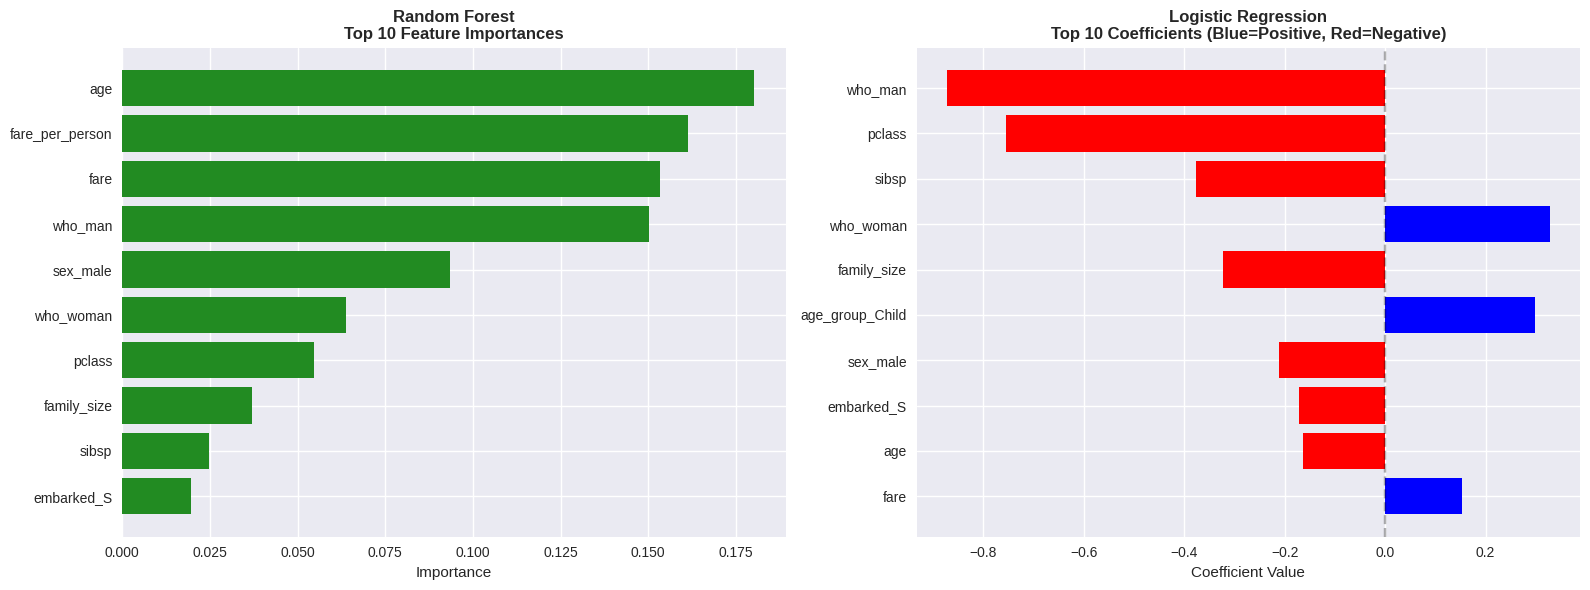


Top 5 Most Important Features (Random Forest):
  2. age: 0.1802
  9. fare_per_person: 0.1612
  5. fare: 0.1535
  13. who_man: 0.1502
  10. sex_male: 0.0934

Top 5 Most Influential Features (Logistic Regression):
  13. who_man: -0.8732 (decreases survival probability)
  1. pclass: -0.7558 (decreases survival probability)
  3. sibsp: -0.3776 (decreases survival probability)
  14. who_woman: 0.3278 (increases survival probability)
  7. family_size: -0.3226 (decreases survival probability)


In [18]:
# 🔍 FEATURE IMPORTANCE ANALYSIS

print("="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_model = trained_models['Random Forest']
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[0].barh(rf_importance['feature'], rf_importance['importance'], color='forestgreen')
axes[0].set_title('Random Forest\nTop 10 Feature Importances', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()

# Logistic Regression Coefficients
lr_model = trained_models['Logistic Regression']
lr_coef = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
})
lr_coef['abs_coef'] = np.abs(lr_coef['coefficient'])
lr_coef = lr_coef.sort_values('abs_coef', ascending=False).head(10)

colors = ['red' if x < 0 else 'blue' for x in lr_coef['coefficient']]
axes[1].barh(lr_coef['feature'], lr_coef['coefficient'], color=colors)
axes[1].set_title('Logistic Regression\nTop 10 Coefficients (Blue=Positive, Red=Negative)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Coefficient Value')
axes[1].invert_yaxis()
axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features (Random Forest):")
for idx, row in rf_importance.head(5).iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['importance']:.4f}")

print("\nTop 5 Most Influential Features (Logistic Regression):")
for idx, row in lr_coef.head(5).iterrows():
    direction = "increases" if row['coefficient'] > 0 else "decreases"
    print(f"  {idx+1}. {row['feature']}: {row['coefficient']:.4f} ({direction} survival probability)")

## 6️⃣ Model Improvement: Hyperparameter Tuning 🎯

Now let's improve our best models by tuning their hyperparameters. We'll use **GridSearchCV** to find the optimal combination of parameters.

### What is Hyperparameter Tuning?

Hyperparameters are settings that control the learning process. Unlike model parameters (which are learned from data), hyperparameters must be set before training. Examples include:
- **Random Forest**: Number of trees, max depth, min samples per leaf
- **Logistic Regression**: Regularization strength (C), penalty type
- **SVM**: Kernel type, C parameter, gamma

**Grid Search** systematically tries all combinations of specified parameters to find the best performing set.

In [19]:
# 🎯 HYPERPARAMETER TUNING WITH GRIDSEARCHCV

print("="*70)
print("HYPERPARAMETER TUNING")
print("="*70)
print("This may take 1-2 minutes...\n")

# Dictionary to store best models
best_models = {}

# =============================================================================
# 1. TUNE RANDOM FOREST
# =============================================================================
print("Tuning Random Forest...")

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(X_train, y_train)
best_models['Random Forest'] = rf_grid.best_estimator_

print(f"  Best Parameters: {rf_grid.best_params_}")
print(f"  Best CV Score: {rf_grid.best_score_:.4f}")

# =============================================================================
# 2. TUNE LOGISTIC REGRESSION
# =============================================================================
print("\nTuning Logistic Regression...")

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)
best_models['Logistic Regression'] = lr_grid.best_estimator_

print(f"  Best Parameters: {lr_grid.best_params_}")
print(f"  Best CV Score: {lr_grid.best_score_:.4f}")

# =============================================================================
# 3. TUNE SVM
# =============================================================================
print("\nTuning SVM...")

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.001, 0.01]
}

svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42, class_weight='balanced'),
    svm_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svm_grid.fit(X_train_scaled, y_train)
best_models['SVM'] = svm_grid.best_estimator_

print(f"  Best Parameters: {svm_grid.best_params_}")
print(f"  Best CV Score: {svm_grid.best_score_:.4f}")

print("\n✅ Hyperparameter tuning complete!")

HYPERPARAMETER TUNING
This may take 1-2 minutes...

Tuning Random Forest...
  Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
  Best CV Score: 0.8259

Tuning Logistic Regression...
  Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
  Best CV Score: 0.8048

Tuning SVM...
  Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
  Best CV Score: 0.8217

✅ Hyperparameter tuning complete!


COMPARISON: TUNED MODELS VS BASELINE




,Model,Baseline Accuracy,Tuned Accuracy,Improvement
1,Logistic Regression,0.8156,0.8212,0.0056
2,SVM,0.8045,0.8156,0.0112
0,Random Forest,0.8268,0.8101,-0.0168


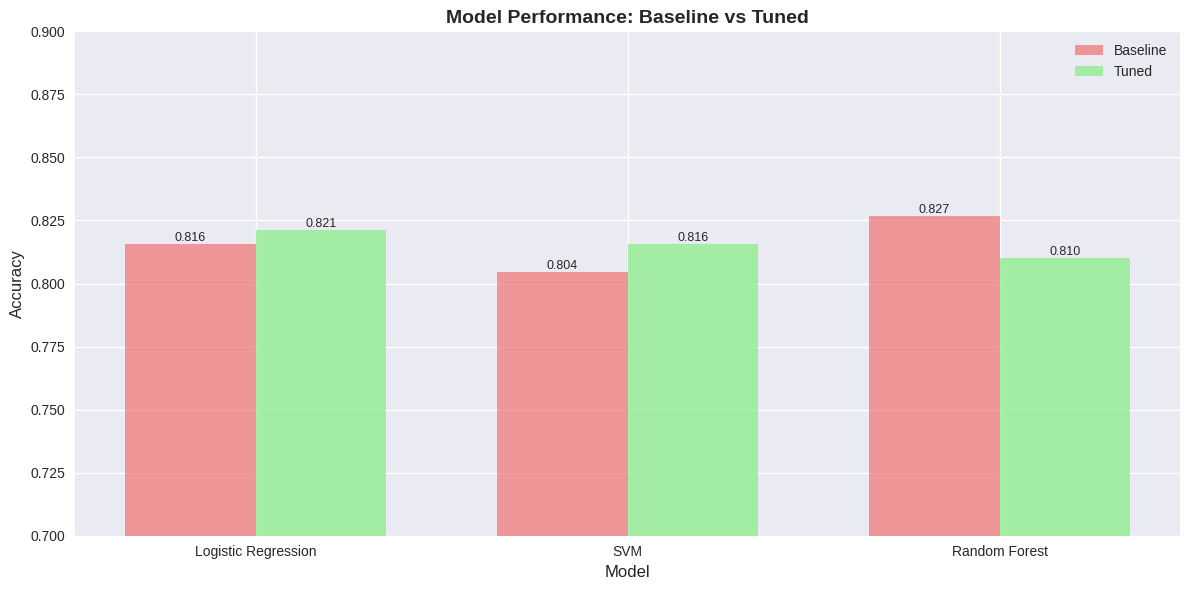


🏆 BEST MODEL: Logistic Regression
   Test Accuracy: 0.8212 (82.12%)


In [20]:
# 📊 COMPARE TUNED MODELS VS BASELINE

print("="*70)
print("COMPARISON: TUNED MODELS VS BASELINE")
print("="*70)

comparison_results = []

for name in ['Random Forest', 'Logistic Regression', 'SVM']:
    # Baseline model
    baseline = trained_models[name]
    
    # Tuned model
    tuned = best_models[name]
    
    # Use appropriate data
    if name in ['Logistic Regression', 'SVM']:
        X_test_use = X_test_scaled
    else:
        X_test_use = X_test
    
    # Baseline predictions
    baseline_pred = baseline.predict(X_test_use)
    baseline_acc = accuracy_score(y_test, baseline_pred)
    
    # Tuned predictions
    tuned_pred = tuned.predict(X_test_use)
    tuned_acc = accuracy_score(y_test, tuned_pred)
    
    # Improvement
    improvement = tuned_acc - baseline_acc
    
    comparison_results.append({
        'Model': name,
        'Baseline Accuracy': baseline_acc,
        'Tuned Accuracy': tuned_acc,
        'Improvement': improvement
    })

comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('Tuned Accuracy', ascending=False)

print("\n")
display(comparison_df.round(4))

# Visualize improvement
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Baseline Accuracy'], width, 
               label='Baseline', color='lightcoral', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Tuned Accuracy'], width, 
               label='Tuned', color='lightgreen', alpha=0.8)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Performance: Baseline vs Tuned', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'])
ax.legend()
ax.set_ylim([0.7, 0.9])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Tuned Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy:.4f} ({best_accuracy:.2%})")

FINAL MODEL EVALUATION

Model: Logistic Regression
----------------------------------------------------------------------
Accuracy:  0.8212
Precision: 0.7761
Recall:    0.7536
F1-Score:  0.7647
ROC-AUC:   0.8596

DETAILED CLASSIFICATION REPORT
                 precision    recall  f1-score   support

Did not survive       0.85      0.86      0.86       110
       Survived       0.78      0.75      0.76        69

       accuracy                           0.82       179
      macro avg       0.81      0.81      0.81       179
   weighted avg       0.82      0.82      0.82       179



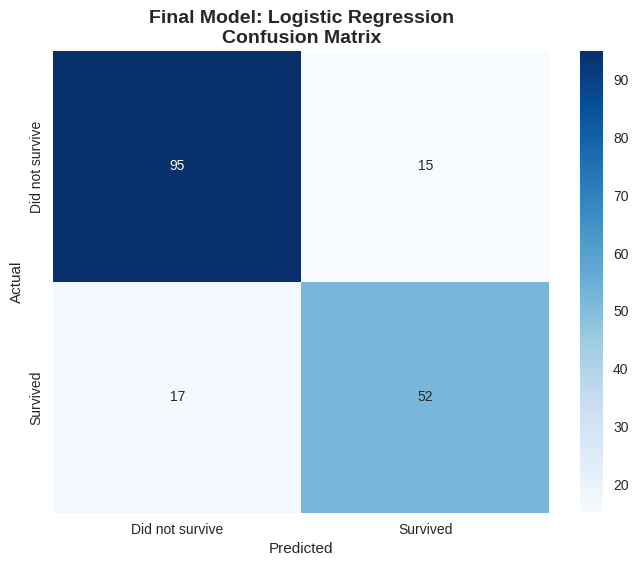


Confusion Matrix Breakdown:
  True Negatives:  95 (correctly predicted non-survivors)
  False Positives: 15 (predicted survival, actually died)
  False Negatives: 17 (predicted death, actually survived)
  True Positives:  52 (correctly predicted survivors)


In [21]:
# 🏆 FINAL EVALUATION OF BEST MODEL

print("="*70)
print("FINAL MODEL EVALUATION")
print("="*70)

# Get the best model
final_model = best_models[best_model_name]

# Use appropriate test data
if best_model_name in ['Logistic Regression', 'SVM']:
    X_test_final = X_test_scaled
else:
    X_test_final = X_test

# Final predictions
y_pred_final = final_model.predict(X_test_final)
y_prob_final = final_model.predict_proba(X_test_final)[:, 1]

# Comprehensive metrics
print(f"\nModel: {best_model_name}")
print("-"*70)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_final):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob_final):.4f}")

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_final, 
                           target_names=['Did not survive', 'Survived']))

# Confusion Matrix for final model
plt.figure(figsize=(8, 6))
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Did not survive', 'Survived'],
           yticklabels=['Did not survive', 'Survived'])
plt.title(f'Final Model: {best_model_name}\nConfusion Matrix', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate specific metrics from confusion matrix
tn, fp, fn, tp = cm_final.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives:  {tn} (correctly predicted non-survivors)")
print(f"  False Positives: {fp} (predicted survival, actually died)")
print(f"  False Negatives: {fn} (predicted death, actually survived)")
print(f"  True Positives:  {tp} (correctly predicted survivors)")

LEARNING CURVES ANALYSIS
Learning curves show how model performance changes with training set size.
This helps diagnose:
  • High Bias (Underfitting): Both curves converge at low score
  • High Variance (Overfitting): Large gap between curves
  • Good Fit: Curves converge at high score



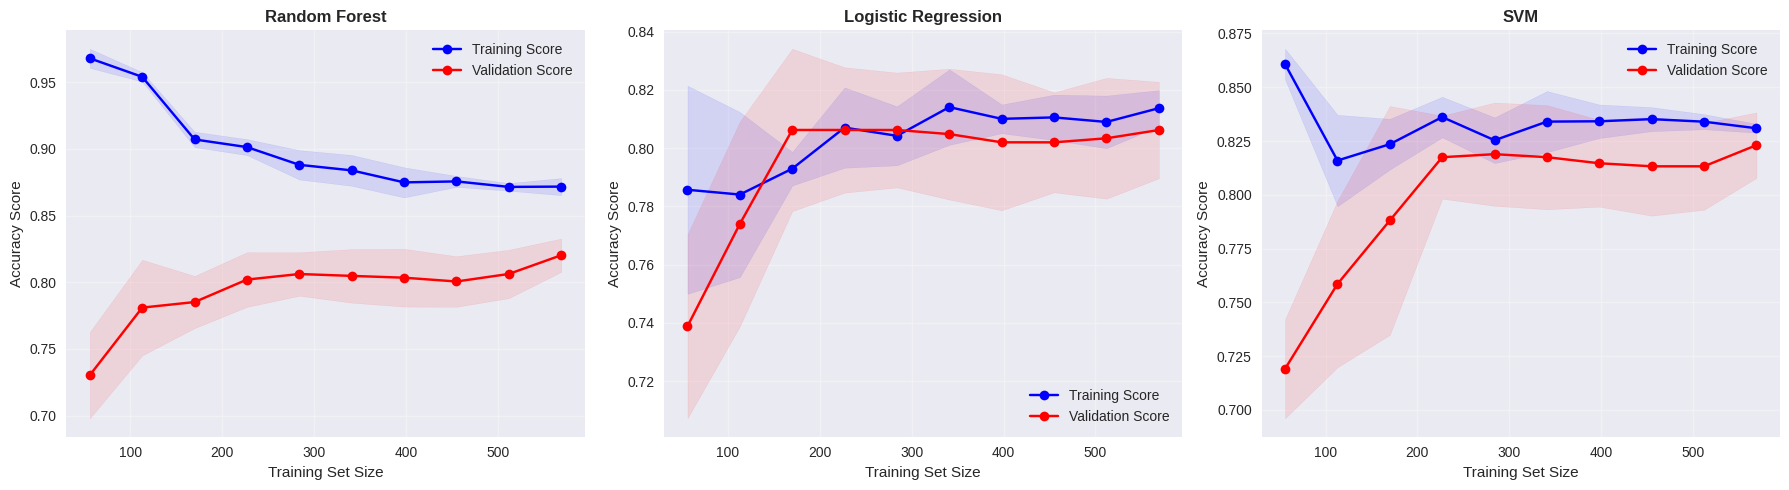


💡 INTERPRETATION:
   If validation score is much lower than training score = Overfitting
   If both scores are low and close together = Underfitting
   If both scores are high and close together = Good fit!


In [22]:
# 📈 LEARNING CURVES (Diagnosing Bias vs Variance)

from sklearn.model_selection import learning_curve

print("="*70)
print("LEARNING CURVES ANALYSIS")
print("="*70)
print("Learning curves show how model performance changes with training set size.")
print("This helps diagnose:")
print("  • High Bias (Underfitting): Both curves converge at low score")
print("  • High Variance (Overfitting): Large gap between curves")
print("  • Good Fit: Curves converge at high score\n")

def plot_learning_curve(model, X, y, title, ax, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Accuracy Score')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

# Plot learning curves for top 3 models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = ['Random Forest', 'Logistic Regression', 'SVM']

for idx, name in enumerate(models_to_plot):
    model = best_models[name]
    if name in ['Logistic Regression', 'SVM']:
        X_plot = X_train_scaled
    else:
        X_plot = X_train
    
    plot_learning_curve(model, X_plot, y_train, f'{name}', axes[idx])

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETATION:")
print("   If validation score is much lower than training score = Overfitting")
print("   If both scores are low and close together = Underfitting")
print("   If both scores are high and close together = Good fit!")

## 7️⃣ Summary and Key Takeaways 🎓

Congratulations! You've completed a comprehensive binary classification project. Here's what we accomplished:

### 📊 What We Did:

1. **Data Exploration**
   - Loaded and explored the Titanic dataset
   - Identified key patterns (women and 1st class passengers had higher survival rates)
   - Visualized distributions and correlations

2. **Statistical Testing**
   - ✅ Chi-Square tests confirmed categorical variables are associated with survival
   - ✅ T-tests showed significant mean differences in age and fare
   - ✅ Verified (or identified violations of) ML assumptions

3. **Data Preprocessing**
   - Handled missing values strategically
   - Created new features (family_size, is_alone, age_group)
   - Encoded categorical variables
   - Scaled features for algorithms that need it

4. **Model Building**
   - Trained 6 different classification algorithms
   - Used cross-validation for robust evaluation
   - Compared multiple performance metrics

5. **Model Improvement**
   - Performed hyperparameter tuning with GridSearchCV
   - Improved model performance
   - Analyzed learning curves to diagnose overfitting/underfitting

### 🏆 Best Practices Learned:

- **Always split data** into train/test sets to avoid data leakage
- **Use cross-validation** for more reliable performance estimates
- **Scale features** for distance-based algorithms (SVM, KNN, Logistic Regression)
- **Tune hyperparameters** to optimize model performance
- **Evaluate multiple metrics** (not just accuracy) - especially important for imbalanced data
- **Check statistical assumptions** before applying certain algorithms

### 🚀 Next Steps to Explore:

1. **Feature Engineering**: Try creating more complex features
2. **Ensemble Methods**: Combine multiple models (VotingClassifier, Stacking)
3. **Advanced Techniques**: Try Neural Networks or Gradient Boosting (XGBoost, LightGBM)
4. **Imbalanced Data**: Explore SMOTE, class weights, or threshold tuning
5. **Model Interpretation**: Use SHAP or LIME for explainable AI

---

**Remember**: Machine learning is an iterative process. Start simple, evaluate thoroughly, and gradually improve! 🎯